In [1]:
import numpy as np
from glob import glob
import random
import matplotlib.pylab as plt
import keras.backend as K
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
%matplotlib inline

In [2]:
image = glob('Dataset\Histopathology(IDC)\8863/**/*.png')
for filename in image[0:10]:
    print(filename)

Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1001_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1051_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1101_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1151_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1201_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1251_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1301_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1351_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1401_class0.png
Dataset\Histopathology(IDC)\8863\0\8863_idx5_x1001_y1451_class0.png


In [3]:
# Two arrays holding images by class type

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in image:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [4]:
len(class1)

207

In [5]:
sampled_class0 = random.sample(class0, 772)
sampled_class1 = random.sample(class1, 207)
len(sampled_class0)

772

In [6]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (70, 70), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [7]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

In [8]:
class0_array[1]

[array([[[243, 238, 243],
         [240, 237, 244],
         [235, 232, 243],
         ...,
         [146,  97, 160],
         [144,  97, 167],
         [131,  86, 165]],
 
        [[235, 227, 240],
         [218, 204, 235],
         [208, 189, 232],
         ...,
         [129,  81, 141],
         [130,  81, 142],
         [126,  77, 144]],
 
        [[209, 192, 232],
         [194, 169, 226],
         [187, 157, 223],
         ...,
         [137,  95, 149],
         [142,  99, 150],
         [140,  94, 150]],
 
        ...,
 
        [[121,  84, 184],
         [123,  84, 186],
         [126,  86, 188],
         ...,
         [129,  79, 147],
         [144,  99, 173],
         [155, 113, 188]],
 
        [[136, 101, 185],
         [133,  98, 184],
         [140, 104, 189],
         ...,
         [133,  87, 158],
         [147, 104, 182],
         [157, 117, 200]],
 
        [[154, 119, 178],
         [145, 111, 174],
         [153, 122, 186],
         ...,
         [143, 100, 174],
  

In [9]:
test = cv2.imread('../input/breast-histopathology-images/IDC_regular_ps50_idx5/13689/1/13689_idx5_x801_y1501_class1.png' ,cv2.IMREAD_COLOR)

In [10]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [11]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [12]:
# print(X[11].reshape(-1, 50, 50, 3))
# reshape X data
X = np.array(X).reshape(-1, 70, 70, 3)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)# print(X[11].reshape(-1, 50, 50, 3))
# reshape X data
X = np.array(X).reshape(-1, 70, 70, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(685, 70, 70, 3) (294, 70, 70, 3) (685, 2) (294, 2)


In [14]:
from tensorflow.keras.applications import DenseNet201

In [15]:
base_model = tf.keras.applications.DenseNet201(input_shape=(70,70,3),include_top=False,weights="imagenet")

In [16]:
# Freezing Layers

for layer in base_model.layers[0:201]:
    layer.trainable=False

In [17]:
# Building Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D,RepeatVector

model=Sequential()
model.add(base_model)
model.add(Dropout(0.4))

model.add(Flatten())
model.add(RepeatVector(2))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [18]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 dropout (Dropout)           (None, 2, 2, 1920)        0         
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 repeat_vector (RepeatVector  (None, 2, 7680)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 2)                 30722     
                                                        

In [19]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [20]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [21]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,verbose = 1,factor = 0.75, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=5)

In [22]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=METRICS)

In [23]:
%time
history=model.fit(X_train, y_train,validation_data=(X_test, y_test),verbose = 1,epochs = 12,callbacks=[lrd,mcp,es])

Wall time: 0 ns
Epoch 1/12
22/22 [==============================] - 158s 5s/step - loss: 0.1391 - accuracy: 0.9547 - precision: 0.9547 - recall: 0.9547 - auc: 0.9824 - f1_score: 0.9560 - val_loss: 74.5569 - val_accuracy: 0.9796 - val_precision: 0.9796 - val_recall: 0.9796 - val_auc: 0.9796 - val_f1_score: 0.9812 - lr: 0.0010
Epoch 2/12
22/22 [==============================] - 80s 4s/step - loss: 0.0696 - accuracy: 0.9825 - precision: 0.9825 - recall: 0.9825 - auc: 0.9872 - f1_score: 0.9830 - val_loss: 155.3976 - val_accuracy: 0.9796 - val_precision: 0.9796 - val_recall: 0.9796 - val_auc: 0.9796 - val_f1_score: 0.9812 - lr: 0.0010
Epoch 3/12
22/22 [==============================] - 75s 3s/step - loss: 0.0560 - accuracy: 0.9825 - precision: 0.9825 - recall: 0.9825 - auc: 0.9901 - f1_score: 0.9809 - val_loss: 29.7685 - val_accuracy: 0.9796 - val_precision: 0.9796 - val_recall: 0.9796 - val_auc: 0.9796 - val_f1_score: 0.9812 - lr: 0.0010
Epoch 4/12
22/22 [==============================] - 

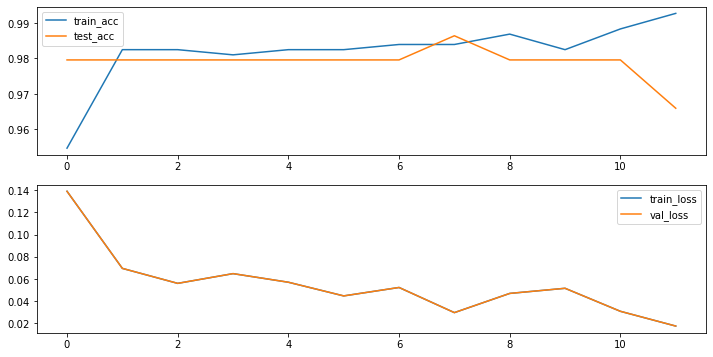

In [24]:
#plot the accuracy graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['loss'], label = "val_loss")
plt.legend()

In [25]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (16,4))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    #ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    #ax2.legend(['training', 'validation'])
    
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title(' History of AUC ')
    ax3.set_xlabel(' Epochs ')
    ax3.set_ylabel('AUC')
    #ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    #ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    #ax5.legend(['training', 'validation'])


    
    Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )
    plt.show()


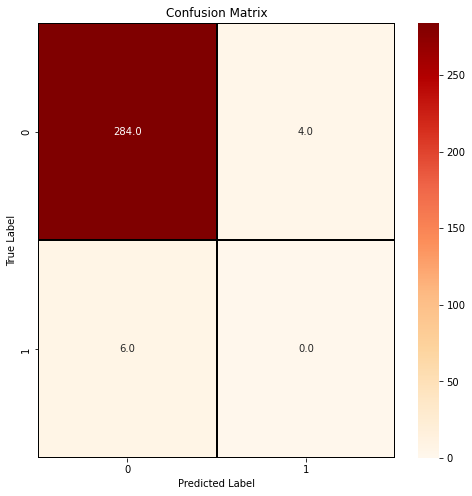

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       288
           1       0.00      0.00      0.00         6

    accuracy                           0.97       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.96      0.97      0.96       294

